### Results  
  
**note:** additional analysis will be included shortly.

In [31]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

In [32]:
# load in results dataset
df = pd.read_csv('GoC Spend Data TF-IDF Model Results.csv', encoding ='utf-8')

#### Checks

In [33]:
# check dataset
df.head(5)

,Quantity,Unit Price,Total Price,Segment Actual,Segment Predicted,Predicted Correctly
0,3.0,4.0,12.0,Information Technology Broadcasting and Teleco...,Information Technology Broadcasting and Teleco...,1
1,2.0,1.0,2.0,Healthcare Services,Healthcare Services,1
2,1.0,306599.2,306599.2,Other Goods,Other Goods,1
3,1.0,1767.0,1767.0,Engineering and Research and Technology Based ...,Engineering and Research and Technology Based ...,1
4,1.0,119914.0,119914.0,Management and Business Professionals and Admi...,Other Services,0


In [34]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65262 entries, 0 to 65261
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Quantity             65262 non-null  float64
 1   Unit Price           65262 non-null  float64
 2   Total Price          65262 non-null  float64
 3   Segment Actual       65262 non-null  object 
 4   Segment Predicted    65262 non-null  object 
 5   Predicted Correctly  65262 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 3.0+ MB


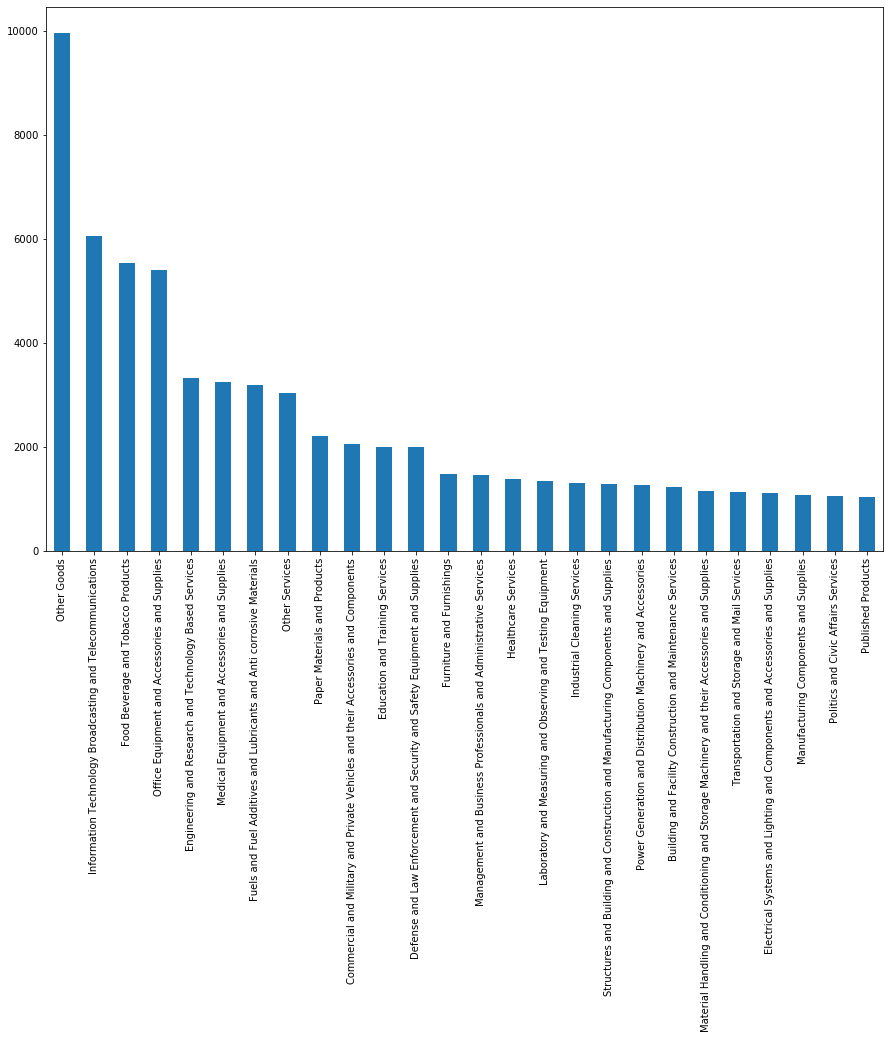

In [35]:
# plot distribution of segments in dataset
plt.figure()
df['Segment Actual'].value_counts().plot( kind='bar', figsize=(15,10))
plt.show()

Create columns for Total Spend and Total Spend Predicted by line items

In [36]:
# create total spend predicted column
df['Total Spend Predicted'] = df['Total Price'] * df['Predicted Correctly']

# create percent of total spend predicted column
df['Percent of Total Spend Predicted'] = df['Total Spend Predicted']/df['Total Price']

Create a dataset for Total Price and Total Spend Predicted by Segment

In [37]:
# create df with sum of total spend and total spend predicted
df_total_spend_predicted = pd.DataFrame(df.groupby('Segment Actual')['Total Price','Total Spend Predicted'].agg(['sum']).reset_index())

# only take relevant colums
df_total_spend_predicted.columns = ['Segment', 'Sum of Total Spend', 'Sum of Total Spend Predicted'] 

# quick check to make sure new df is correct
df_total_spend_predicted.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Segment,Sum of Total Spend,Sum of Total Spend Predicted
0,Building and Facility Construction and Mainten...,2.423209e+08,1.362092e+08
1,Commercial and Military and Private Vehicles a...,2.965680e+08,2.486637e+08
2,Defense and Law Enforcement and Security and S...,3.836800e+07,2.489165e+07
3,Education and Training Services,5.459838e+08,4.686064e+08
4,Electrical Systems and Lighting and Components...,1.985239e+07,7.928454e+06


Create a dataset for sum, count and mean of line items correctly predicted by predicted Segment. 

In [38]:
# create df with sum of line itmes and line items predicted correctly by segment
df_line_items= pd.DataFrame(df.groupby('Segment Actual')['Predicted Correctly'].agg(['sum', 'count', 'mean']).reset_index())

# select on relevant columns
df_line_items.columns = ['Segment', 'Sum Predicted Correctly', 'Total Line Items', 'Percent of Line Items Correctly Predicted']

df_line_items = df_line_items.sort_values(by=('Percent of Line Items Correctly Predicted'), ascending = False)

# quick check to make sure new df is correct
df_line_items.head(5)

,Segment,Sum Predicted Correctly,Total Line Items,Percent of Line Items Correctly Predicted
6,Food Beverage and Tobacco Products,5423,5536,0.979588
7,Fuels and Fuel Additives and Lubricants and An...,3060,3198,0.956848
3,Education and Training Services,1844,1992,0.925703
17,Office Equipment and Accessories and Supplies,4896,5401,0.906499
9,Healthcare Services,1185,1379,0.859318


Merge line items and total spend dataframes together

In [74]:
# merge the two dataframes
df_merged = pd.merge(df_line_items, df_total_spend_predicted, on='Segment')

# create a column for total spend correctly predicted
df_merged['Percent of Total Spend Predicted'] = df_merged['Sum of Total Spend Predicted']/df_merged['Sum of Total Spend']

# quick check to make sure new df is correct
df_merged.head(5)

,Segment,Sum Predicted Correctly,Total Line Items,Percent of Line Items Correctly Predicted,Sum of Total Spend,Sum of Total Spend Predicted,Percent of Total Spend Predicted
0,Food Beverage and Tobacco Products,5423,5536,0.979588,9.314119e+07,9.096065e+07,0.976589
1,Fuels and Fuel Additives and Lubricants and An...,3060,3198,0.956848,5.733126e+07,5.547421e+07,0.967608
2,Education and Training Services,1844,1992,0.925703,5.459838e+08,4.686064e+08,0.858279
3,Office Equipment and Accessories and Supplies,4896,5401,0.906499,2.410488e+07,1.832133e+07,0.760067
4,Healthcare Services,1185,1379,0.859318,2.299454e+10,2.279858e+10,0.991478


#### Results  
  
The model strongly predicted F&B, Fuel, Education Services, Office Supplies and Health Services. Health Services’ percent of spend was strongly predicted (99%) and fortunately in this case had by far the highest spend – helping drive the model predicting 92% of Total Spend. 

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


[]

<Figure size 432x288 with 0 Axes>

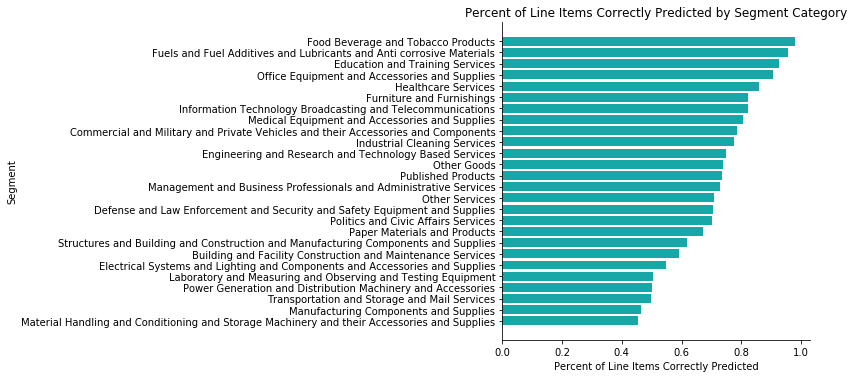

In [69]:
# plot precent of line items correctly predicted by segment category
plt.figure()
sns.catplot(x='Percent of Line Items Correctly Predicted', y='Segment', kind='bar', color="c", data=df_merged)
plt.title('Percent of Line Items Correctly Predicted by Segment Category')
plt.plot()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


[]

<Figure size 432x288 with 0 Axes>

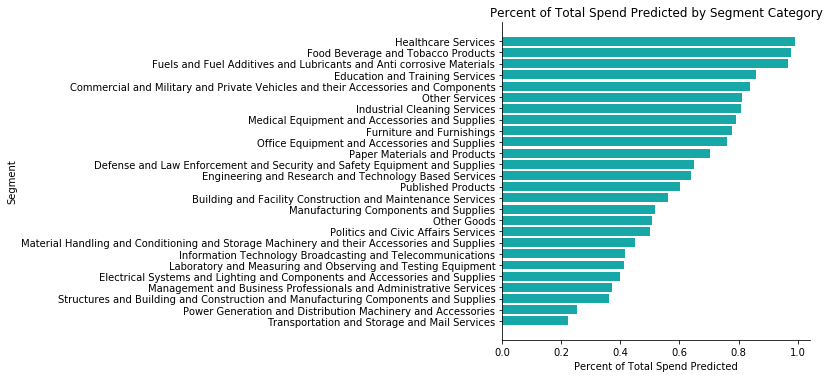

In [72]:
# plot precent of line items correctly predicted by segment category
plt.figure()
sns.catplot(x='Percent of Total Spend Predicted', y='Segment', kind='bar', color="c", data=df_merged.sort_values(by=('Percent of Total Spend Predicted'), ascending = False))
plt.title('Percent of Total Spend Predicted by Segment Category')
plt.plot()

[]

<Figure size 432x288 with 0 Axes>

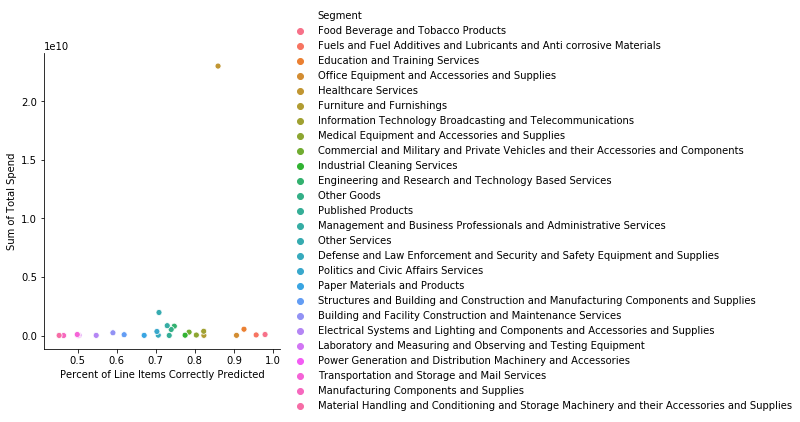

In [67]:
# plot bubble chart of precent of line items correctly predicted and total spend
plt.figure()
sns.relplot(x='Percent of Line Items Correctly Predicted', y='Sum of Total Spend', hue='Segment', data=df_merged)
plt.plot()

#### Conclusion

The model exceeded my expectations on accuracy for 26 categories with 77%. However, it’s applications to corporate data may be limited as a results of differences between the public sector and corperate spending focuses. Further analysis include exploring a meta-model incorporating quantity and price. 

**note:** additional analysis will be included shortly.